In [ ]:
import yfinance as yf

# Download historical data for Microsoft Corp (MSFT)
stock = yf.Ticker("MSFT")
df = stock.history(period="1y")  # Fetch 1-year data

print(df.head())  

                                 Open        High         Low       Close  \
Date                                                                        
2024-03-11 00:00:00-04:00  400.700827  402.606262  398.219768  401.455048   
2024-03-12 00:00:00-04:00  404.531549  412.421326  403.707851  412.133514   
2024-03-13 00:00:00-04:00  414.932134  415.011515  408.332526  411.954865   
2024-03-14 00:00:00-04:00  417.055891  424.578475  414.822939  421.998169   
2024-03-15 00:00:00-04:00  416.113112  419.398030  409.662361  413.264862   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-03-11 00:00:00-04:00  16120800        0.0           0.0  
2024-03-12 00:00:00-04:00  22457000        0.0           0.0  
2024-03-13 00:00:00-04:00  17115900        0.0           0.0  
2024-03-14 00:00:00-04:00  34157300        0.0           0.0  
2024-03-15 00:00:00-04:00  45049800        0.0           0.0  


In [2]:
import pandas as pd

# Drop unnecessary columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Handling missing values
df.dropna(inplace=True)

print(df.info())  # Check for null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-03-11 00:00:00-04:00 to 2025-03-11 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Close   251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB
None


In [ ]:
# We will calculate key financial indicators like Moving Average (MA) and Relative Strength Index (RSI)

df['50_MA'] = df['Close'].rolling(window=50).mean()  # 50-day moving average
df['200_MA'] = df['Close'].rolling(window=200).mean()  # 200-day moving average

In [ ]:
# RSI Calculation (Relative Strength Index)

def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['Close'])

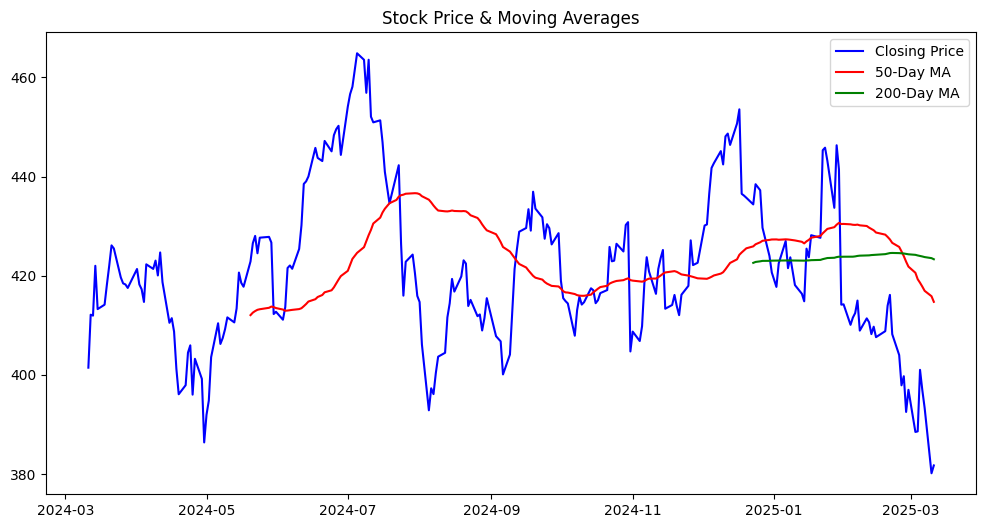

In [ ]:
# Plot stock price trends using matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price", color="blue")
plt.plot(df['50_MA'], label="50-Day MA", color="red")
plt.plot(df['200_MA'], label="200-Day MA", color="green")
plt.legend()
plt.title("Stock Price & Moving Averages")
plt.show()

In [6]:
# We will use Linear Regression to predict stock prices based on past trends.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df['Date'] = df.index.map(pd.Timestamp.timestamp)  # Convert date to timestamp
X = df[['Date']]  
y = df['Close']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
df['Predicted_Price'] = model.predict(X)

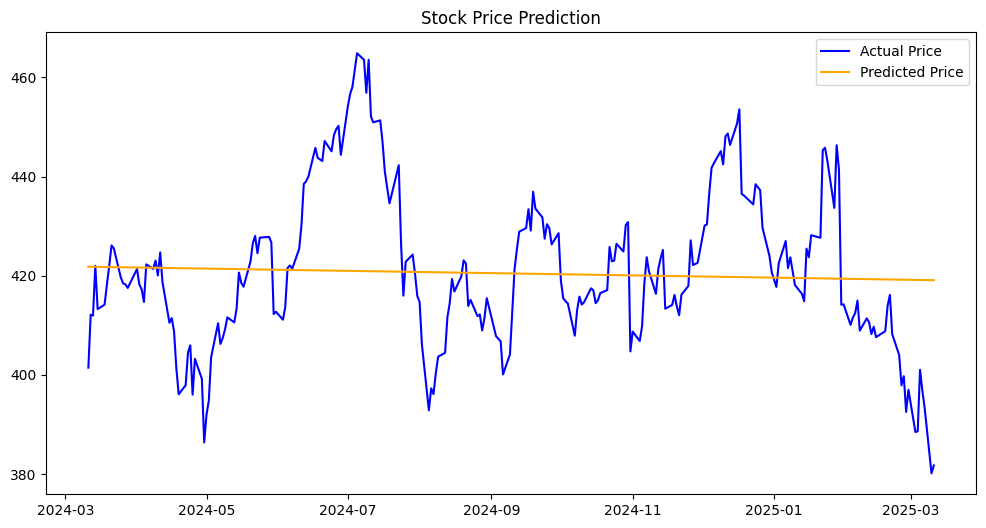

In [ ]:
# Plot Prediction

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Actual Price", color="blue")
plt.plot(df.index, df['Predicted_Price'], label="Predicted Price", color="orange")
plt.legend()
plt.title("Stock Price Prediction")
plt.show()